# Crimes Against Women Analysis by Ankit Kumar
### Enrollement no: 0901AM231011

## NEC PROJECT 
- **Course Name:** Statistical Data Analysis Through Programming  
- **Mentor Name:** Dhananjay Bisen  
- **Institution:** MITS-DU  

##  Project Overview
This project analyzes crimes against women using statistical techniques to identify trends and predict future occurrences using Linear Regression and LSTM models.

##  Dataset Overview
- **Source:** https://www.ncrb.gov.in
- **Features:**
  - **Location:** STATE/UT, DISTRICT
  - **Time:** Year
  - **Crime Types:** Rape, Kidnapping, Dowry Deaths, Assault, Cruelty by Husband, etc.

## Exploratory Data Analysis (EDA)
- **Data Cleaning & Visualization**
- **Trends & Correlations Analysis**

## Models Used
### **1️⃣ Linear Regression**
- Predicts crime trends based on historical data.
- **Metrics:** Mean Squared Error, R² Score

### **2️⃣ LSTM Model**
- Captures temporal crime patterns for better forecasting.
- **Metrics:** RMSE, MAE

## Results & Insights
- **Linear Regression:** Good for trend prediction.
- **LSTM:** More accurate for time-series forecasting.
- **Key Findings:** Rising crime trends in specific regions.

## Conclusion
This analysis helps understand crime trends and can assist law enforcement in preventive measures.

## Future Work
- Add more features (socioeconomic factors, law enforcement data).
- Improve prediction accuracy with advanced deep learning models.

---
 *Submission for "Statistical Data Analysis Through Programming" at MITS-DU.*


#  ToC

### Project Details
- [Project Overview](#project-overview)
- [Dataset Overview](#dataset-overview)

### Data Processing & Analysis
- [Data Cleaning](#data-cleaning)
- #### **[Visualizations](#visualizations-thorugh-line-chart-bar-chart-histogram-and-heatmap)**

### Predictive Modeling
- [Prepare Data for Modeling](#prepare-the-data-for-predictive-modeling-by-creating-relevant-features)
- [Data Splitting](#data-splitting)
- [Linear Regression Model](#train-a-linear-regression-model-to-predict-the-total-number-of-crimes-against-women)
- [Model Evaluation](#evaluate-the-performance-of-the-trained-linear-regression-model)
- [Model Optimization](#implement-hyperparameter-tuning-for-the-linear-regression-model-using-ridge-and-lasso-regularization)

### Deep Learning Model (LSTM)
- [Prepare Data for LSTM](#prepare-the-data-for-lstm)
- [Build and Train LSTM Model](#build-and-train-the-lstm-model)
- [Predict Future Crime Rates](#predict-future-crime-rates)

📌 *Click on the links to navigate to specific sections in the notebook.*


In [1]:
import pandas as pd

df = pd.read_csv('crimes_against_women_2001-2014.csv')
display(df.head())

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


## Data exploration

Explore the loaded crime data to understand its structure and characteristics.


In [2]:

print("Shape of the DataFrame:", df.shape) #for shaping 

print("\nData Types of Columns:\n", df.dtypes) # for data types

print("\nMissing Values per Column:\n", df.isnull().sum()) # for missing values

print("\nSummary Statistics for Numerical Columns:\n", df.describe()) # for summary statistics

Shape of the DataFrame: (10677, 11)

Data Types of Columns:
 Unnamed: 0                                              int64
STATE/UT                                               object
DISTRICT                                               object
Year                                                    int64
Rape                                                    int64
Kidnapping and Abduction                                int64
Dowry Deaths                                            int64
Assault on women with intent to outrage her modesty     int64
Insult to modesty of Women                              int64
Cruelty by Husband or his Relatives                     int64
Importation of Girls                                    int64
dtype: object

Missing Values per Column:
 Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                       

Summary Statistics for Total Crimes per Year:
                Rape  Kidnapping and Abduction  Dowry Deaths  \
count     14.000000                 14.000000     14.000000   
mean   44225.571429              53299.857143  15391.428571   
std    12511.991028              28560.309150   1586.170120   
min    31694.000000              26592.000000  12416.000000   
25%    36529.000000              31242.000000  13789.500000   
50%    42134.000000              43355.000000  16176.000000   
75%    47395.000000              68245.000000  16691.000000   
max    73470.000000             114622.000000  17236.000000   

       Assault on women with intent to outrage her modesty  \
count                                          14.000000     
mean                                        86589.857143     
std                                         29424.780634     
min                                         65878.000000     
25%                                         68546.000000     
50%          

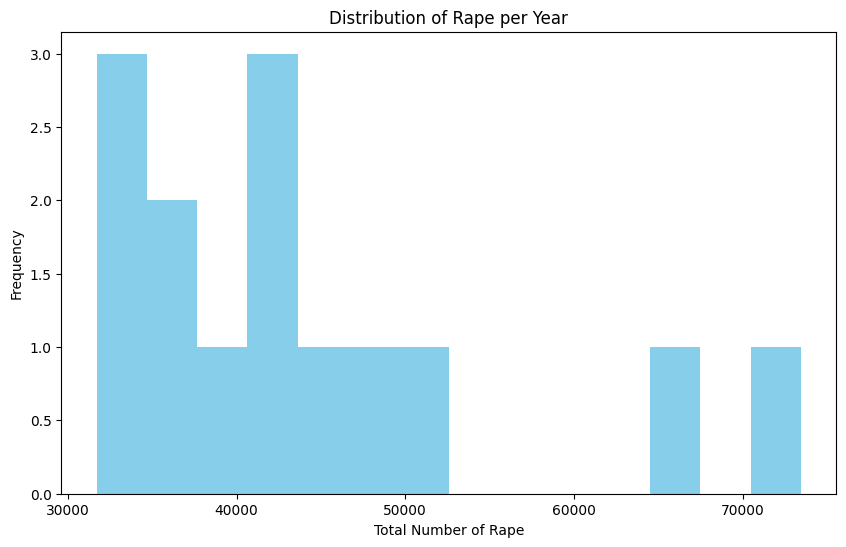


Total Crimes by State:
                                                             DISTRICT   Rape  \
STATE/UT                                                                      
A & N ISLANDS      ANDAMANNICOBARTOTALANDAMANNICOBARTOTALANDAMANN...    218   
A & N Islands      South AndamanNorth & Middle AndamanNicobarTota...     64   
A&N Islands                                    CARNORTHSOUTHZZ TOTAL     54   
ANDHRA PRADESH     ADILABADANANTAPURCHITTOORCUDDAPAHEAST GODAVARI...  26958   
ARUNACHAL PRADESH  CHANGLANGDIBANG VALLEYKAMENG EASTKAMENG WESTLO...   1000   
...                                                              ...    ...   
UTTARAKHAND        ALMORABAGESHWARCHAMOLICHAMPAWATDEHRADUNHARIDWA...   2756   
Uttar Pradesh      AGRAALIGARHALLAHABADAMBEDKAR NAGARAMETHIAMROHA...  13034   
Uttarakhand        ALMORABAGESHWARCHAMOLICHAMPAWATDEHRADUNHARIDWA...    996   
WEST BENGAL        24 PARGANAS NORTH24 PARGANAS SOUTHASANSOLBANKU...  41574   
West Bengal        24 PARGA

In [ ]:
# Group data by year and calculate the total number of crimes for each year
total_crimes_per_year = df.groupby('Year').sum().drop(['Unnamed: 0'], axis=1)

# Calculate summary statistics for the total number of crimes per year
print("Summary Statistics for Total Crimes per Year:\n", total_crimes_per_year.describe())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(total_crimes_per_year['Rape'], bins=14, color='skyblue')
plt.xlabel("Total Number of Rape")
plt.ylabel("Frequency")
plt.title("Distribution of Rape per Year")
plt.show()

# Explore the distribution of crimes across different states
crimes_by_state = df.groupby('STATE/UT').sum().drop(['Unnamed: 0', 'Year'], axis=1)
print("\nTotal Crimes by State:\n", crimes_by_state)

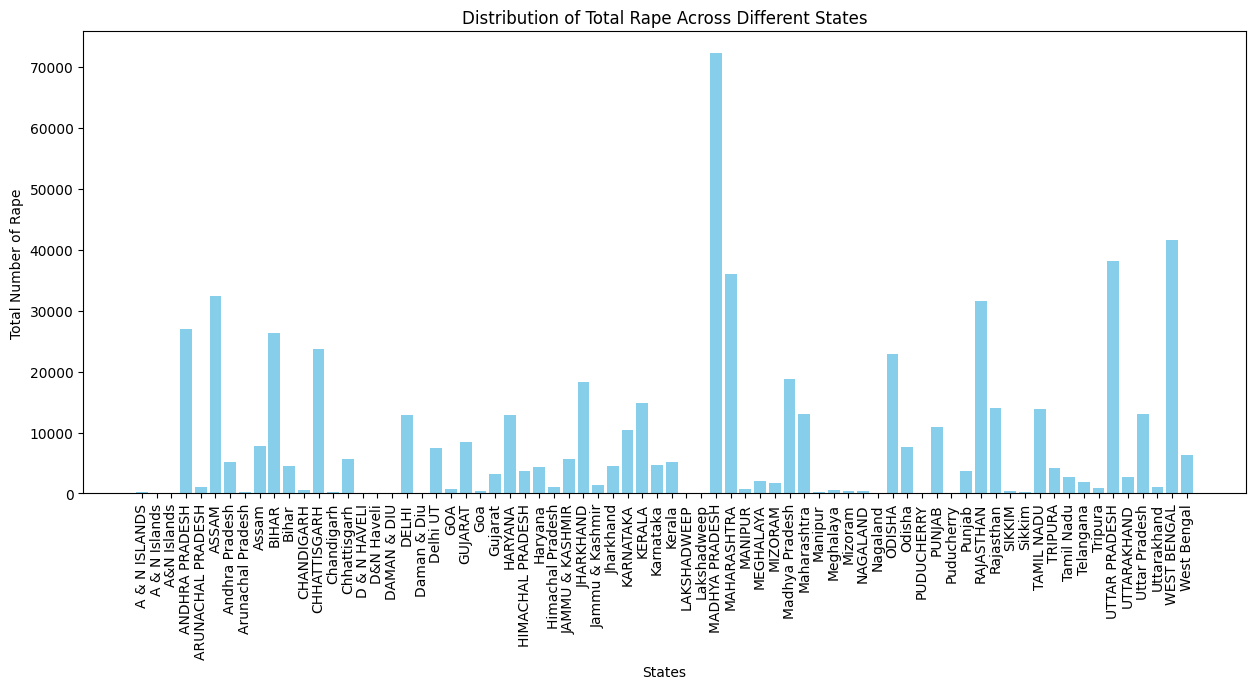

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(crimes_by_state.index, crimes_by_state['Rape'], color='skyblue')
plt.xlabel("States")
plt.ylabel("Total Number of Rape")
plt.title("Distribution of Total Rape Across Different States")
plt.xticks(rotation=90)
plt.show()

## Data cleaning

Clean the crime data by handling potential inconsistencies and ensuring data integrity.


### **Remove duplicate rows and check for data consistency in the 'Year' column.**


In [6]:
df.drop_duplicates(inplace=True)

valid_years = range(2001, 2015)
df = df[df['Year'].isin(valid_years)]


### **Standardize state/UT names and inspect for outliers in numerical columns.**


In [ ]:
df['STATE/UT'] = df['STATE/UT'].str.upper().str.strip()

numerical_cols = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                  'Assault on women with intent to outrage her modesty',
                  'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                  'Importation of Girls']
for col in numerical_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers detected in {col}:")
    display(outliers[[col]])

Outliers detected in Rape:


,Rape
28,871
70,817
115,888
121,144
132,104
...,...
10664,280
10665,266
10666,234
10670,251


Outliers detected in Kidnapping and Abduction:


,Kidnapping and Abduction
28,765
70,1070
115,518
135,171
139,117
...,...
10664,369
10665,402
10666,397
10670,546


Outliers detected in Dowry Deaths:


,Dowry Deaths
8,62
26,52
28,420
70,59
97,69
...,...
10610,66
10611,51
10632,50
10640,501


Outliers detected in Assault on women with intent to outrage her modesty:


,Assault on women with intent to outrage her modesty
8,414
10,208
15,207
26,241
27,246
...,...
10664,595
10665,469
10666,494
10670,484


Outliers detected in Insult to modesty of Women:


,Insult to modesty of Women
0,34
2,83
3,38
4,58
6,129
...,...
10664,665
10665,123
10666,68
10670,63


Outliers detected in Cruelty by Husband or his Relatives:


,Cruelty by Husband or his Relatives
6,378
7,746
18,421
21,520
27,348
...,...
10654,477
10660,349
10662,521
10670,416


Outliers detected in Importation of Girls:


,Importation of Girls
18,7
28,7
77,8
97,6
101,1
...,...
10291,1
10629,2
10632,1
10634,1



### **Handle outliers detected in the previous step by replacing them with the median value for each column**.

In [8]:
for col in numerical_cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()

## Data wrangling
### **Create a new column 'Total Crimes' by summing all crime types, convert the 'Year' column to datetime, and group the data by 'STATE/UT' and 'Year' to calculate total crimes for each state and year.**


In [ ]:
crime_columns = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths',
                 'Assault on women with intent to outrage her modesty',
                 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
                 'Importation of Girls']
df['Total Crimes'] = df[crime_columns].sum(axis=1)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_state_year = df.groupby(['STATE/UT', 'Year'])['Total Crimes'].sum().reset_index() # group by state and year

## **visualizations thorugh line chart, bar chart, histogram and heatmap.**

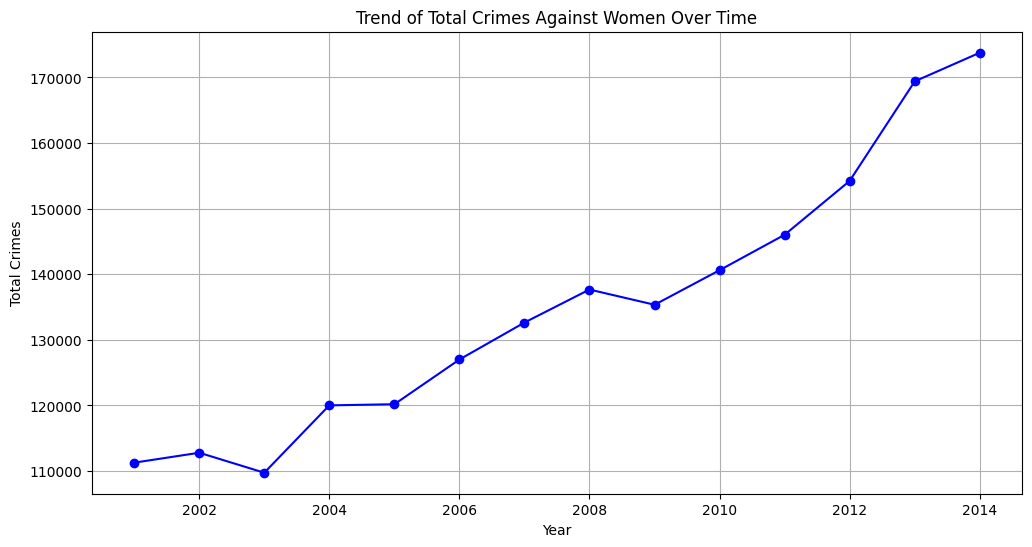

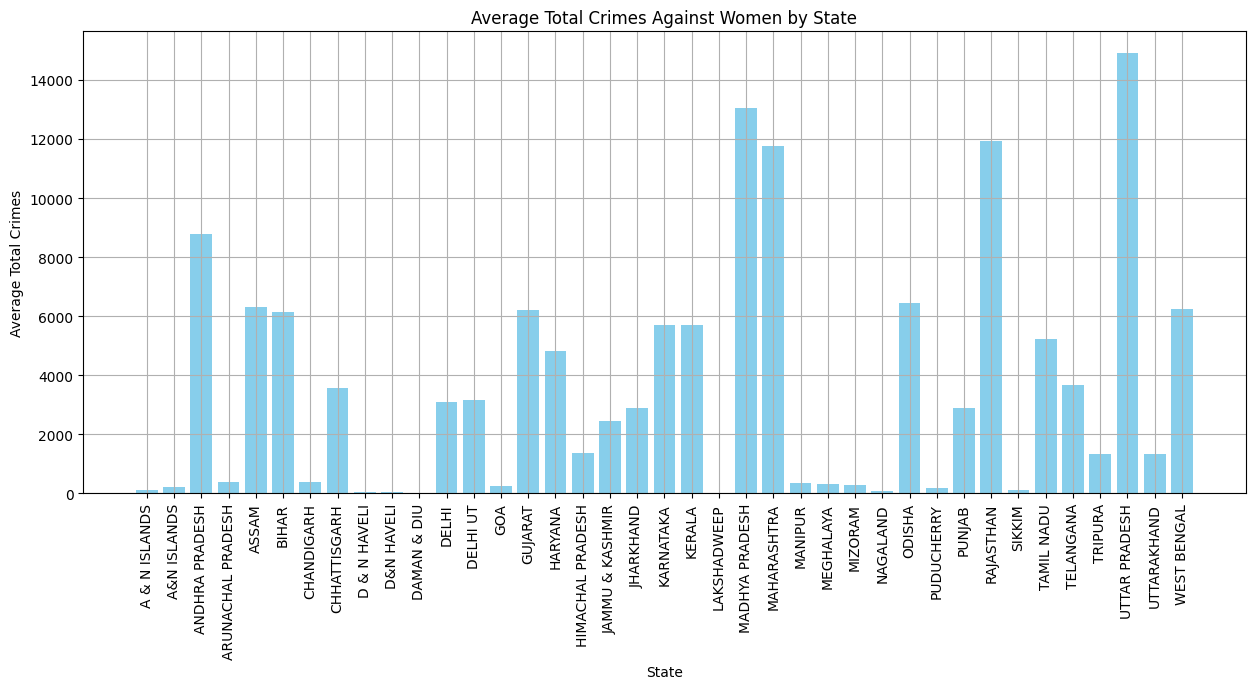

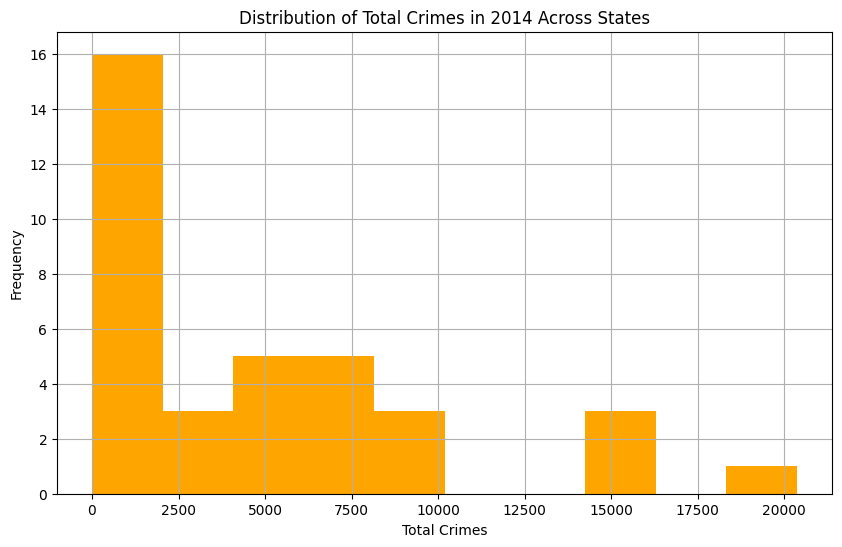

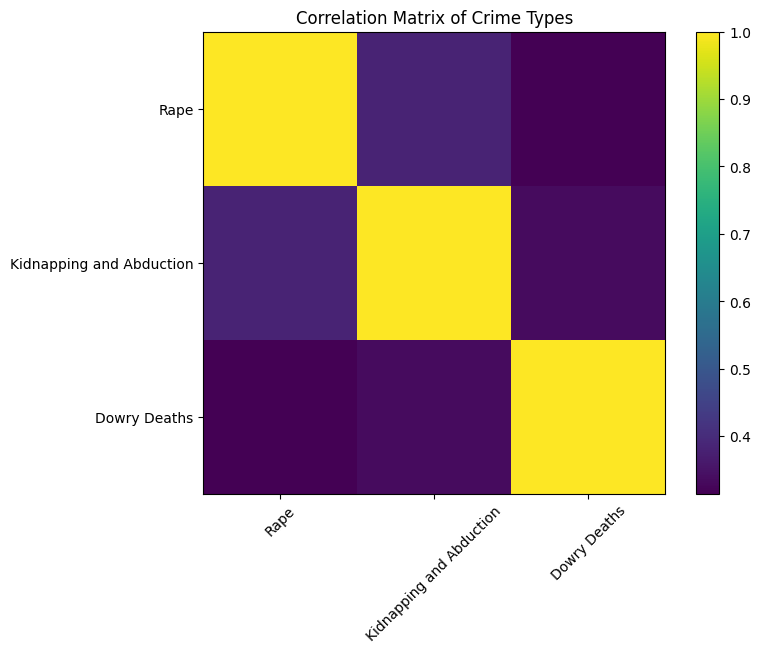

In [11]:
import matplotlib.pyplot as plt

total_crimes_by_year = df_state_year.groupby('Year')['Total Crimes'].sum()
plt.figure(figsize=(12, 6))
plt.plot(total_crimes_by_year.index, total_crimes_by_year.values, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.title('Trend of Total Crimes Against Women Over Time')
plt.grid(True)
plt.show()

average_crimes_by_state = df_state_year.groupby('STATE/UT')['Total Crimes'].mean()
plt.figure(figsize=(15, 6))
plt.bar(average_crimes_by_state.index, average_crimes_by_state.values, color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Total Crimes')
plt.title('Average Total Crimes Against Women by State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

crimes_in_2014 = df_state_year[df_state_year['Year'] == pd.to_datetime('2014-01-01')]['Total Crimes']
plt.figure(figsize=(10, 6))
plt.hist(crimes_in_2014, bins=10, color='orange')
plt.xlabel('Total Crimes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Crimes in 2014 Across States')
plt.grid(True)
plt.show()


correlation_matrix = df[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths']].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix of Crime Types')
plt.show()

# Prepare the data for predictive modeling by creating relevant features.
### **Create lagged variables for 'Total Crimes' based on the 'Year' and 'STATE/UT' columns.**


In [12]:
df_state_year['Total Crimes Lag 1'] = df_state_year.groupby('STATE/UT')['Total Crimes'].shift(1)

### **Perform one-hot encoding on the 'STATE/UT' column using pandas get_dummies.**

In [13]:
df_state_year = pd.get_dummies(df_state_year, columns=['STATE/UT'], prefix=['State'])

### **Scale the numerical variables 'Total Crimes' and 'Total Crimes Lag 1' using StandardScaler.**

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Total Crimes', 'Total Crimes Lag 1']
df_state_year[numerical_features] = scaler.fit_transform(df_state_year[numerical_features])

## Data splitting

### **Split the prepared data into training, testing, and validation sets.**


In [ ]:
from sklearn.model_selection import train_test_split

X = df_state_year.drop('Total Crimes', axis=1)
y = df_state_year['Total Crimes']

X_train, X_test_val, y_train, y_test_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
X_test, X_val, y_test, y_val = train_test_split(
    X_test_val, y_test_val, test_size=0.5, random_state=42, shuffle=True
)
# Further split the testing/validation set into testing and validation sets (50% each)

## Model training
### **Train a linear regression model to predict the total number of crimes against women.**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
imputer = SimpleImputer(strategy='mean')# Create an imputer to fill NaN values with the mean
X_train_imputed = imputer.fit_transform(X_train.drop('Year', axis=1))
X_test_imputed = imputer.transform(X_test.drop('Year', axis=1))# Transform the test data using the fitted imputer


# Training the model 
model = LinearRegression()
model.fit(X_train_imputed, y_train)

y_pred = model.predict(X_test_imputed)

## Model evaluation
### **Evaluate the performance of the trained linear regression model.**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 0.02
R-squared: 0.96
Mean Absolute Error (MAE): 0.10


## Model optimization


### **Implement hyperparameter tuning for the linear regression model using Ridge and Lasso regularization.**

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge and Lasso regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create Ridge and Lasso models
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search Cross Validation for Ridge regression
ridge_grid = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train_imputed, y_train)

# Perform Grid Search Cross Validation for Lasso regression
lasso_grid = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X_train_imputed, y_train)

# Print the best hyperparameters and scores for Ridge and Lasso
print("Best Ridge hyperparameters:", ridge_grid.best_params_)
print("Best Ridge MSE:", -ridge_grid.best_score_)
print("Best Lasso hyperparameters:", lasso_grid.best_params_)
print("Best Lasso MSE:", -lasso_grid.best_score_)

# Train the best Ridge and Lasso models on the full training data
best_ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
best_lasso = Lasso(alpha=lasso_grid.best_params_['alpha'])
best_ridge.fit(X_train_imputed, y_train)
best_lasso.fit(X_train_imputed, y_train)


# Evaluate the best Ridge model on the validation set
y_pred_ridge = best_ridge.predict(X_test_imputed)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print("\nRidge Regression Model Performance on Validation Set:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")

# Evaluate the best Lasso model on the validation set
y_pred_lasso = best_lasso.predict(X_test_imputed)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print("\nLasso Regression Model Performance on Validation Set:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R-squared: {r2_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")

Best Ridge hyperparameters: {'alpha': 0.001}
Best Ridge MSE: 0.051758357712447675
Best Lasso hyperparameters: {'alpha': 0.001}
Best Lasso MSE: 0.06531542328575542

Ridge Regression Model Performance on Validation Set:
MSE: 0.02
R-squared: 0.96
MAE: 0.10

Lasso Regression Model Performance on Validation Set:
MSE: 0.03
R-squared: 0.95
MAE: 0.11


In [19]:
import numpy as np

# Get the coefficients of the best Ridge model
coefficients = best_ridge.coef_

# Create a DataFrame to store the feature names and coefficients
feature_importance = pd.DataFrame({'feature': X_train.drop('Year', axis=1).columns, 'coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients in descending order
feature_importance = feature_importance.reindex(feature_importance.coefficient.abs().sort_values(ascending=False).index)

# Print the feature importance
print("Feature Importance:")
display(feature_importance)


# Remove features with very low coefficients (e.g., coefficients close to 0)
threshold = 0.01
features_to_remove = feature_importance[np.abs(feature_importance['coefficient']) < threshold]['feature'].tolist()

# Remove the selected features from X_train and X_test
X_train_reduced = X_train.drop('Year', axis=1).drop(features_to_remove, axis=1)
X_test_reduced = X_test.drop('Year', axis=1).drop(features_to_remove, axis=1)

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it
X_train_reduced_imputed = imputer.fit_transform(X_train_reduced)

# Transform the test data using the fitted imputer
X_test_reduced_imputed = imputer.transform(X_test_reduced)

# Train the Ridge model with reduced features
best_ridge_reduced = Ridge(alpha=ridge_grid.best_params_['alpha'])
best_ridge_reduced.fit(X_train_reduced_imputed, y_train)

# Evaluate the Ridge model with reduced features on the validation set
y_pred_ridge_reduced = best_ridge_reduced.predict(X_test_reduced_imputed)
mse_ridge_reduced = mean_squared_error(y_test, y_pred_ridge_reduced)
r2_ridge_reduced = r2_score(y_test, y_pred_ridge_reduced)
mae_ridge_reduced = mean_absolute_error(y_test, y_pred_ridge_reduced)
print("\nRidge Regression Model Performance with Reduced Features on Validation Set:")
print(f"MSE: {mse_ridge_reduced:.2f}")
print(f"R-squared: {r2_ridge_reduced:.2f}")
print(f"MAE: {mae_ridge_reduced:.2f}")

Feature Importance:


,feature,coefficient
37,State_UTTAR PRADESH,1.730686
23,State_MADHYA PRADESH,1.444493
32,State_RAJASTHAN,1.293045
24,State_MAHARASHTRA,1.235723
2,State_A&N ISLANDS,-0.825866
3,State_ANDHRA PRADESH,0.738790
10,State_D&N HAVELI,-0.686561
9,State_D & N HAVELI,-0.544045
22,State_LAKSHADWEEP,-0.543665
11,State_DAMAN & DIU,-0.542170



Ridge Regression Model Performance with Reduced Features on Validation Set:
MSE: 0.02
R-squared: 0.96
MAE: 0.10


In [20]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_ridge_reduced, X_train_reduced_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the cross-validation scores
print("Cross-validation scores:", -cv_scores)
print("Mean cross-validation score:", -np.mean(cv_scores))

Cross-validation scores: [0.05035446 0.03739039 0.06873695 0.06627454 0.03603544]
Mean cross-validation score: 0.05175835771244587


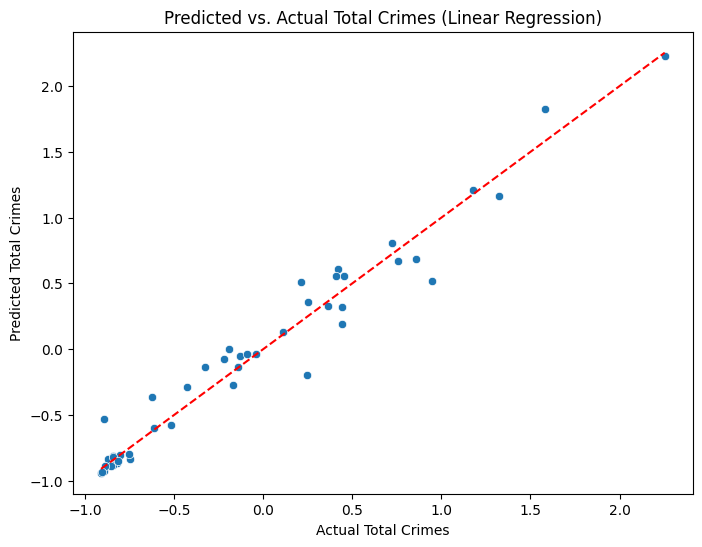

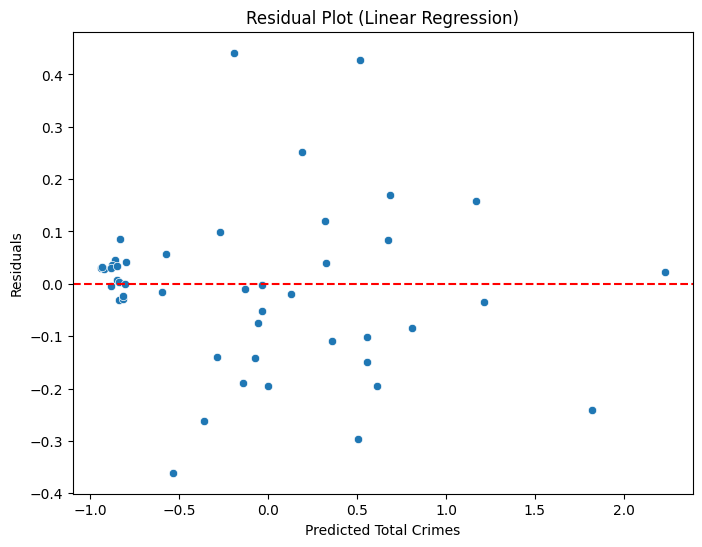

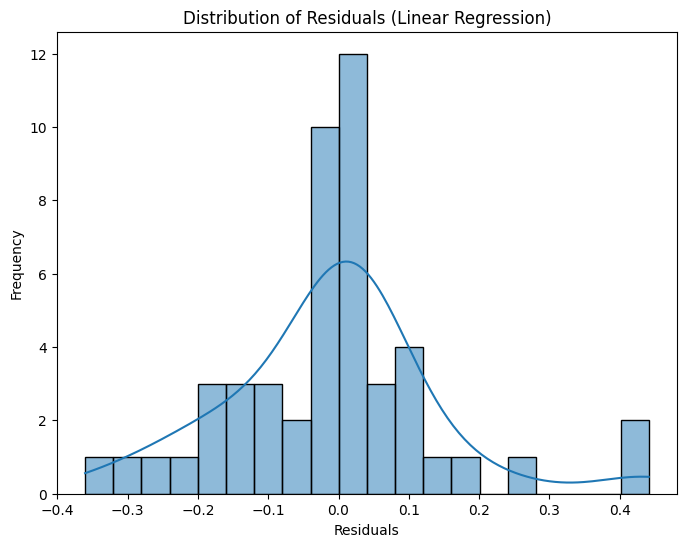

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Total Crimes")
plt.ylabel("Predicted Total Crimes")
plt.title("Predicted vs. Actual Total Crimes (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line for reference
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Total Crimes")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0 for reference
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Linear Regression)")
plt.show()

# Prepare the data for LSTM

In [22]:
import numpy as np

# Assuming 'df_state_year' is your DataFrame with 'Year', 'Total Crimes', and state dummies
# Select relevant features (e.g., 'Total Crimes' and state dummies)
features = ['Total Crimes'] + [col for col in df_state_year.columns if col.startswith('State_')]
data = df_state_year[features].values

# Reshape data for LSTM (samples, timesteps, features)
timesteps = 3  # Number of previous years to consider
num_features = len(features)
samples = len(data) - timesteps

X = np.array([data[i:i + timesteps] for i in range(samples)])
y = np.array([data[i + timesteps][0] for i in range(samples)])  # Target variable is 'Total Crimes'

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build and train the LSTM model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(timesteps, num_features)))
model.add(Dense(1))  # Output layer for predicting 'Total Crimes'

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Ensure X_train and y_train are NumPy arrays with the correct data type
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 1.0441
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.9207
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.7332
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5332 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4556 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3822 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.2913
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2207 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2751 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2542 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2776 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3218 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2571 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2092 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.247

In [26]:
# Ensure X_test and y_test are NumPy arrays with the correct data type
import numpy as np
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error (MSE): 0.09
R-squared: 0.89


## Predict future crime rates

In [28]:
# Prepare data for future prediction
last_timesteps_data = data[-timesteps:]  # Get the last 'timesteps' years of data
future_data = np.array(last_timesteps_data, dtype=np.float32).reshape(1, timesteps, num_features)  # Ensure consistent data type

# Predict future crime rates
future_prediction = model.predict(future_data)

print("Predicted future crime rate:", future_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted future crime rate: 0.64272004


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step


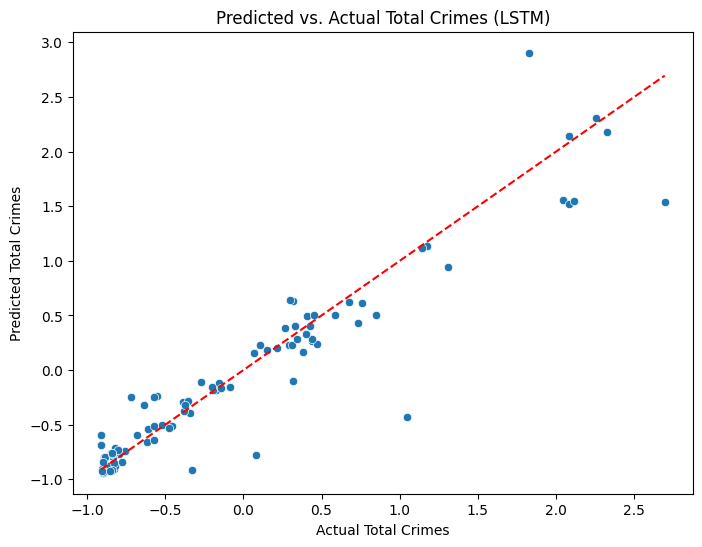

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Reshape y_test and y_pred for plotting
y_test = y_test.reshape(-1, 1)  
y_pred = y_pred.reshape(-1, 1)

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten())
plt.xlabel("Actual Total Crimes")
plt.ylabel("Predicted Total Crimes")
plt.title("Predicted vs. Actual Total Crimes (LSTM)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Add a diagonal line for reference
plt.show()

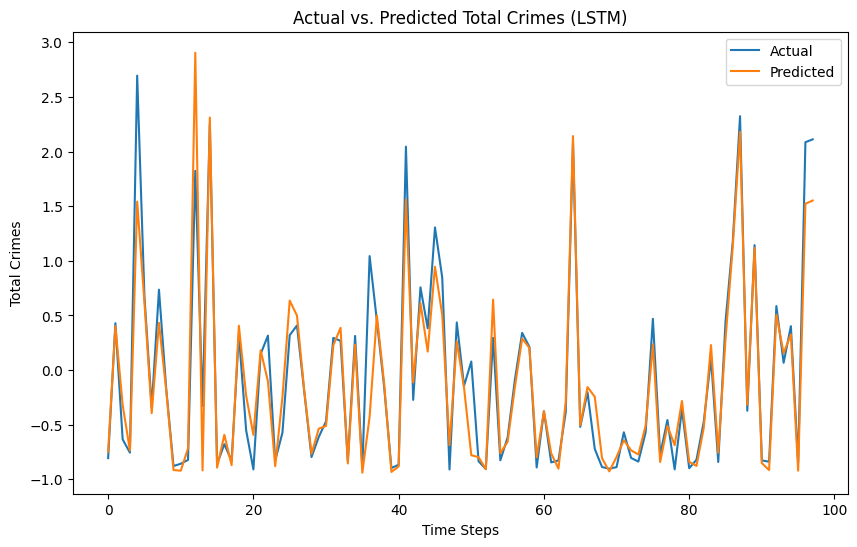

In [30]:
# Assuming 'y_test' and 'y_pred' are already available
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Total Crimes")
plt.title("Actual vs. Predicted Total Crimes (LSTM)")
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.09
R-squared: 0.89


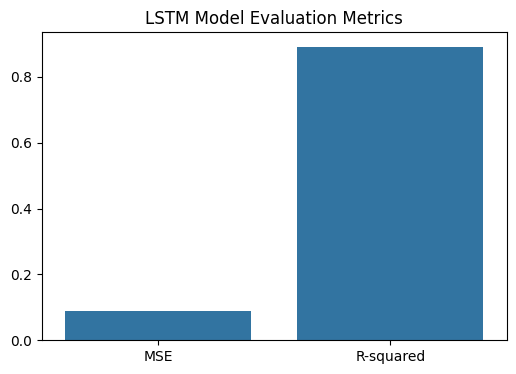

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Create a bar plot for evaluation metrics
metrics = ['MSE', 'R-squared']
values = [mse, r2]

plt.figure(figsize=(6, 4))
sns.barplot(x=metrics, y=values)
plt.title("LSTM Model Evaluation Metrics")
plt.show()